In [316]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [317]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [319]:
df = pd.read_csv('mydata.csv', encoding='utf-8')

In [320]:
df.columns

Index(['Q1', 'Q2_1', 'Q3_1', 'Q3_2', 'Q3_3', 'Q4', 'Q5', 'Q6', 'Q7_1', 'Q8',
       'Q9_1', 'Q10_1', 'Q11_1', 'Q12', 'Q13', 'Q14_1', 'Q15_1', 'Q16', 'Q17',
       'Q18', 'Q19'],
      dtype='object')

In [321]:
df.columns = ['institution','zt_adoption','sda','sdwan','sddc','segmentation','access_control','anomaly_detection','encryption',
              'security_automation','patching','mfa','sso','policy_engine','risk_detection','privilege_mngt','mdm','managed_device_policy','unmanaged_device_policy','dlp','endpoint_protection'
]

In [322]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0

In [323]:
df.corr()

,zt_adoption,encryption,patching,mfa,sso,privilege_mngt,mdm
zt_adoption,1.000000,0.664564,0.550278,0.652399,0.490507,0.422504,0.461103
encryption,0.664564,1.000000,0.496918,0.524690,0.406441,0.455404,0.574874
patching,0.550278,0.496918,1.000000,0.519880,0.506912,0.677521,0.144985
mfa,0.652399,0.524690,0.519880,1.000000,0.914083,0.557489,0.468274
sso,0.490507,0.406441,0.506912,0.914083,1.000000,0.606259,0.333664
privilege_mngt,0.422504,0.455404,0.677521,0.557489,0.606259,1.000000,0.225636
mdm,0.461103,0.574874,0.144985,0.468274,0.333664,0.225636,1.000000


In [324]:
df.describe()

,zt_adoption,encryption,patching,mfa,sso,privilege_mngt,mdm
count,115.000000,105.000000,114.000000,77.000000,77.000000,113.000000,74.000000
mean,3.052174,2.676190,3.236842,2.272727,2.324675,3.203540,3.486486
std,0.814813,0.837754,0.767742,1.474666,1.542738,0.745933,1.807467
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000
50%,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,5.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


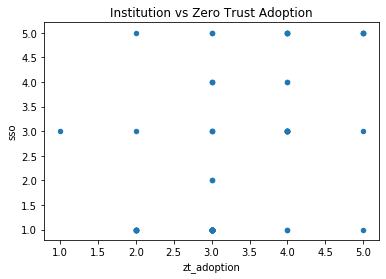

In [325]:
df.plot(kind='scatter', x='zt_adoption', y='sso', title='Institution vs Zero Trust Adoption');

In [326]:
#https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm

In [327]:
inst = df['institution']

In [328]:
institution = df['institution'].dropna().unique().tolist()
institution

['Bank', 'SACCO', 'Insurance company']

<BarContainer object of 3 artists>

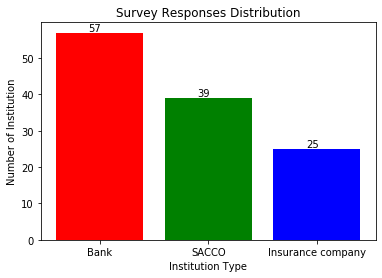

In [329]:
plt.xlabel("Institution Type")
plt.ylabel("Number of Institution")
institution_count = df['institution'].value_counts()
for i in range(len(institution)):
    plt.annotate(institution_count[i], (-0.1+i,institution_count[i]+0.5 ))
    
plt.title("Survey Responses Distribution")    
plt.bar(institution,(institution_count), color=['red', 'green', 'blue'])

In [330]:
institution

['Bank', 'SACCO', 'Insurance company']

In [331]:
# Software defined access
sda_crosstab = pd.crosstab(index=df['institution'].rename('Institution'), columns=df['sda'].rename(''), )
sda_crosstab


,No,Yes
Institution,,
Bank,46,11
Insurance company,25,0
SACCO,36,3


In [332]:
# WAN
sdwan_crosstab = pd.crosstab(index=df['institution'].rename('Institution'), columns=df['sdwan'].rename('') )
sdwan_crosstab

,No,Yes
Institution,,
Bank,38,18
Insurance company,24,1
SACCO,36,3


In [333]:

sddc_crosstab = pd.crosstab(index=df['institution'].rename('Institution'), columns=df['sddc'].rename('') )
sddc_crosstab

,No,Yes
Institution,,
Bank,41,14
Insurance company,23,0
SACCO,35,4


[1.0, 2.0, 3.0, 4.0, 5.0] [41, 3, 3, 2, 1]


<BarContainer object of 5 artists>

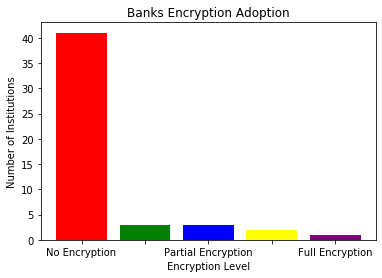

In [334]:
encryption = df[df['institution']=='Bank']['encryption'].dropna().unique().tolist()
encryption.sort(reverse=False)
encryption
encryption_level_count = df[df['institution']=='Bank']['encryption'].value_counts().tolist()
encryption_level_count

print(encryption,encryption_level_count )
values=['No Encryption', '','Partial Encryption', '','Full Encryption']
plt.xlabel("Encryption Level")
plt.ylabel("Number of Institutions")
plt.title("Banks Encryption Adoption")
plt.xticks(encryption,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(encryption,(encryption_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])


[1.0, 2.0, 3.0, 4.0, 5.0] [15, 9, 4, 1, 1]


<BarContainer object of 5 artists>

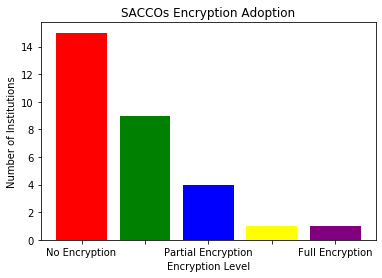

In [335]:
encryption = df[df['institution']=='SACCO']['encryption'].dropna().unique().tolist()
encryption.sort(reverse=False)
encryption_level_count = df[df['institution']=='SACCO']['encryption'].value_counts().tolist()
encryption_level_count

print(encryption,encryption_level_count )
values=['No Encryption', '','Partial Encryption', '','Full Encryption']
plt.xlabel("Encryption Level")
plt.ylabel("Number of Institutions")
plt.title("SACCOs Encryption Adoption")
plt.xticks(encryption,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(encryption,(encryption_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

[1, 2.0, 3.0, 4, 5] [18, 7, 0, 0, 0]


<BarContainer object of 5 artists>

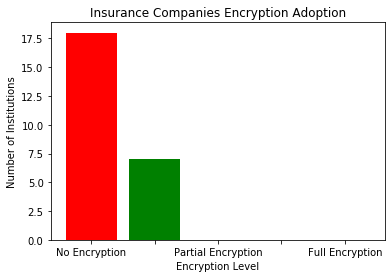

In [336]:
encryption = df[df['institution']=='Insurance company']['encryption'].dropna().unique().tolist()
encryption.sort(reverse=False)
encryption.append(1)
encryption.append(4)
encryption.append(5)
encryption.sort(reverse=False)
encryption_level_count = df[df['institution']=='Insurance company']['encryption'].value_counts().tolist()
encryption_level_count.append(0)
encryption_level_count.append(0)
encryption_level_count.append(0)
print(encryption,encryption_level_count )
values=['No Encryption', '','Partial Encryption', '','Full Encryption']
plt.xlabel("Encryption Level")
plt.ylabel("Number of Institutions")
plt.title("Insurance Companies Encryption Adoption")
plt.xticks(encryption,values)
#for i in range(len(encryption)):
#    plt.annotate(encryption_level_count[i], (-0.1+i,encryption_level_count[i]+0.5))
plt.bar(encryption,(encryption_level_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

In [337]:
df[['zt_adoption','sda']].corr()

,zt_adoption
zt_adoption,1.0


[2, 23, 58, 19, 1]
[0, 0, 5, 2, 5]


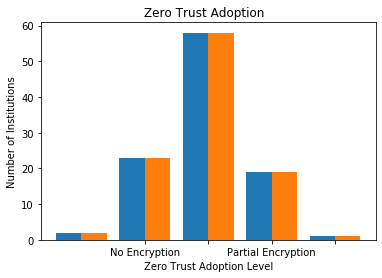

In [364]:
zt_adoption = df['zt_adoption'].dropna().unique().tolist()
zt_adoption.sort(reverse=False)
zt_adoption
#sda_count = df['sda'].value_counts().tolist()
# sda_count = df['sda'].groupby(['zt_adoption']).value_counts().tolist()
sda_yes_count = df.groupby(['zt_adoption']).agg({'sda': lambda x: len([i for j in list(x) if "Yes" in j])})
#sda_yes_count = df.groupby(['zt_adoption']).agg({'sda': lambda x: {"Yes":len(list(x)) for k,v in x.items()  if v=="No"}})
sda_no_count = df.groupby(['zt_adoption']).agg({'sda': lambda x: len([i for j in list(x) if "No" in j])})

# print(sda_yes_count,sda_no_count)
X_axis = np.arange(len(zt_adoption))
#values=['', '2','Partial', '4','Full']
values=['No Encryption','','Partial Encryption','','Full Encryption']
plt.xlabel("Zero Trust Adoption Level")
plt.ylabel("Number of Institutions")
plt.title("Zero Trust Adoption  ")
plt.xticks(zt_adoption, values)
plt.bar(X_axis - 0.2, list([int(i) for i in sda_no_count['sda']]), 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, list([int(i) for i in sda_no_count['sda']]), 0.4, label = 'No')

#plt.bar(encryption,(sda_count), color=['red', 'green', 'blue', 'yellow', 'purple'])

print(list(sda_no_count['sda']))
print(list(sda_yes_count['sda']))